## Importing libraries

In [37]:
import tensorflow
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

### Loading and Preprocessing the image

In [4]:
img = image.load_img("Images/baskets1.jpeg", target_size = (224,224))

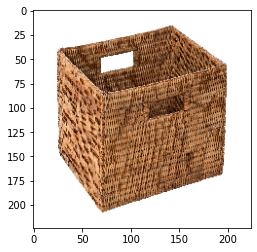

In [6]:
plt.imshow(img)

In [7]:
img_arr = image.img_to_array(img)

In [10]:
img_arr.shape

(224, 224, 3)

In [18]:
expand_img = np.expand_dims(img_arr, axis = 0)

In [19]:
expand_img.shape

(1, 224, 224, 3)

In [20]:
expand_img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [21]:
preprocess_img = preprocess_input(expand_img)

In [22]:
preprocess_img.shape

(1, 224, 224, 3)

### Model Building

In [25]:
model = ResNet50(weights = "imagenet", include_top = False, input_shape=(224,224,3))
model.trainable = False

In [26]:
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

### Prediction

In [31]:
img_predict = model.predict(preprocess_img)
img_predict

array([[3.2120619e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4085550e+00,
        1.6958714e-03, 1.1912886e+00]], dtype=float32)

In [32]:
img_predict.shape

(1, 2048)

In [36]:
img_flatten = img_predict.flatten()   ##### converting into 1 dimension
img_flatten.shape

(2048,)

#### Normalize the Prediction

In [43]:
norm_value = norm(img_flatten)
norm_value

278.97937

In [41]:
norm_result = img_flatten/norm_value

In [42]:
norm_result

array([1.1513618e-02, 0.0000000e+00, 0.0000000e+00, ..., 8.6334525e-03,
       6.0788416e-06, 4.2701676e-03], dtype=float32)